In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Combine the data into a single dataset
city_ride_data_df = pd.merge(city_data_df, ride_data_df, how='outer', on="city")

# Display the data table for preview
city_ride_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#tabulate total number of rides and average fare by city
city_ride_tot = city_ride_data_df.groupby(['city'])["ride_id"].count()
city_fare_avg = city_ride_data_df.groupby(['city'])["fare"].mean()

#create dataframe with above tabulated data
city_ride_fare_df = pd.DataFrame({"Total Number of Rides":city_ride_tot,
                                 "Average Ride Fare":city_fare_avg})
#display data for preview
city_ride_fare_df.head()

,Total Number of Rides,Average Ride Fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Barronchester,16,36.422500
Bethanyland,18,32.956111
Bradshawfurt,10,40.064000


In [6]:
# extract and put into new dataframe drive count & city type data 
 #based on city from the combined data table
city_ride_data_1_df = city_ride_data_df[['city', 'type', 'driver_count']]
city_ride_data_2_df = city_ride_data_1_df.groupby(["city"], as_index=False).last()
city_ride_data_2_df.head()

#merge new dataframe with rides & fares dataframe
all_city_ride_data_df = pd.merge(city_ride_data_2_df, city_ride_fare_df, how="outer", on="city")
data = all_city_ride_data_df[['type', 'driver_count', 'Total Number of Rides', 'Average Ride Fare']]

## Bubble Plot of Ride Sharing Data

In [7]:
#create dataframe for each city type 
urban_df = data.loc[data["type"] == "Urban", :]
suburban_df = data.loc[data["type"] == "Suburban", :]
rural_df = data.loc[data["type"] == "Rural", :]

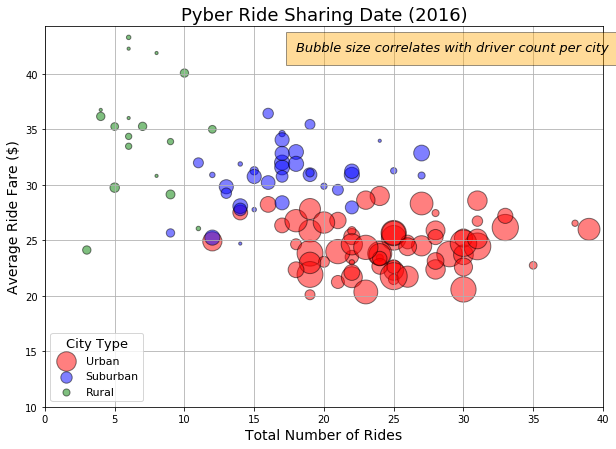

In [8]:
#Set size of chart
plt.figure(figsize=(10,7))

# Build the scatter plots for each city types
plt.scatter(urban_df['Total Number of Rides'], urban_df['Average Ride Fare'], marker="o", facecolors="red", edgecolors="black",
            s=urban_df['driver_count']*10, alpha=0.5)
plt.scatter(suburban_df['Total Number of Rides'], suburban_df['Average Ride Fare'], marker="o", facecolors="blue", edgecolors="black",
            s=suburban_df['driver_count']*10, alpha=0.5)
plt.scatter(rural_df['Total Number of Rides'], rural_df['Average Ride Fare'], marker="o", facecolors="green", edgecolors="black",
            s=rural_df['driver_count']*10, alpha=0.5)

#set axes limits
plt.axis([0, all_city_ride_data_df["Total Number of Rides"].max() + 1, 10, all_city_ride_data_df["Average Ride Fare"].max() + 1 ])

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides", fontsize=14)
plt.ylabel("Average Ride Fare ($)", fontsize=14)
plt.title("Pyber Ride Sharing Date (2016)", fontsize=18)

#Create a legend
legend = plt.legend(["Urban", "Suburban", "Rural"], title="City Type", loc='lower left', fontsize=11)
plt.setp(legend.get_title(),fontsize=13)

#create grid lines
plt.grid()

# Incorporate a text label regarding circle size
plt.text(18, 42, "Bubble size correlates with driver count per city", fontsize=13, style='oblique', bbox={'facecolor':'orange', 'alpha':0.4, 'pad':10})

#Save Figure
plt.savefig("images/PyberRideShare2016.png")
plt.show()

## Total Fares by City Type

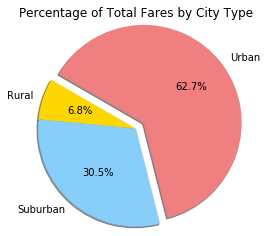

In [9]:
#Set size of chart
plt.figure(figsize=(5, 3))

# Calculate Type Percents
fare_data = city_ride_data_df.groupby(['type'])["fare"].sum()
ride_data = city_ride_data_df.groupby(['type'])["ride_id"].count()
total_data = pd.DataFrame({"Total Fare by City":fare_data,
                          "Total Ride by City":ride_data})
total_data.reset_index(level=0, drop=False, inplace=True)

# Build Pie Chart
labels = total_data['type']
fare = total_data['Total Fare by City']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)
plt.pie(fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1.5)
plt.title("Percentage of Total Fares by City Type", pad=30)

# Save Figure
plt.savefig("images/PyberFaresbyCity.png")
plt.show()

## Total Rides by City Type

<Figure size 360x216 with 0 Axes>

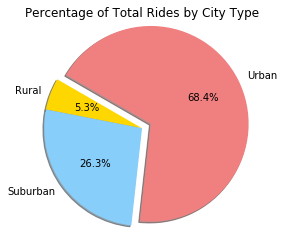

In [10]:
#Set size of chart
plt.figure(figsize=(5, 3))

#Build Pie Chart
plt.figure(figsize=(5, 3))
labels = total_data['type']
fare = total_data['Total Ride by City']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)
plt.pie(fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1.5)
plt.title("Percentage of Total Rides by City Type", pad=30)

# Save Figure
plt.savefig("images/PyberRidesbyCity.png")
plt.show()

## Total Drivers by City Type

In [11]:
#tabulate and create new dataframe for driver data based on city type
driver_data = city_data_df.groupby(["type"])["driver_count"].sum()
driver_data_df = pd.DataFrame(driver_data)
driver_data_df.reset_index(level=0, drop=False, inplace=True)
driver_data_df

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


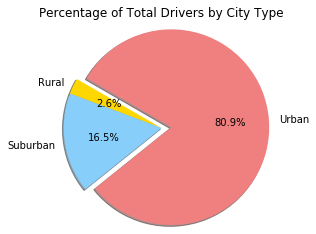

In [12]:
#Set size of chart
plt.figure(figsize=(5, 3))

# Build Pie Charts
labels = driver_data_df['type']
drivers = driver_data_df['driver_count']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1.5)
plt.title("Percentage of Total Drivers by City Type", pad=30)

# Save Figure
plt.savefig("images/PyberDriverssbyCity.png")
plt.show()

# Observations and Analysis

The bubble graph shows that average ride fare in rural areas had the biggest range , while urban areas' average ride fare had the smallest range. This is likely due to trip volume and trip distance; with higher trip volume and shorter distance per trip in the urban areas, average ride fare is lower and with less fluctuations. 

Almost 81% of all the company's drivers worked in the urban areas but they only generated 62.7% of the total fare. 16.5% of the company's drivers worked in the subruban areas and they generated more than 30% of the total fare. One of the main reasons is that the average fare was much higher in the suburban areas as shown in the bubble graph. 